# 데이터 탐색

In [8]:
# library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# colab 연결
from google.colab import drive
drive.mount('/gdrive')

data_dir = '/gdrive/My Drive/data/compound/'

Mounted at /gdrive


There are 5530 compound samples with:
* SMILES - 2D compound structure,
* InChIKey - a hash from InChI,
* group - a tag to split the dataset into train and test
* activity - y label

In [5]:
cmpd_df = pd.read_csv(data_dir+'cmpd.csv')
cmpd_df.head()

,inchikey,smiles,group,activity
0,FNHKPVJBJVTLMP-UHFFFAOYSA-N,CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...,train,active
1,CUDVHEFYRIWYQD-UHFFFAOYSA-N,CNC(=O)c1cccc2cc(Oc3ccnc4cc(OCC5(N)CC5)c(OC)cc...,train,active
2,TTZSNFLLYPYKIL-UHFFFAOYSA-N,Cc1cc2cc(Oc3ccnc(Nc4cccc(CS(=O)(=O)NCCN(C)C)c4...,test,active
3,UOVCGJXDGOGOCZ-UHFFFAOYSA-N,COc1cc2c(cc1F)C(c1ccccc1Cl)=Nc1c(n[nH]c1C)N2,train,active
4,CUIHSIWYWATEQL-UHFFFAOYSA-N,Cc1ccc(Nc2nccc(N(C)c3ccc4c(C)n(C)nc4c3)n2)cc1S...,test,active


set of label: {'intermediate', 'active', 'inactive', 'unknown'}

Smiles mean: 53.10614828209765


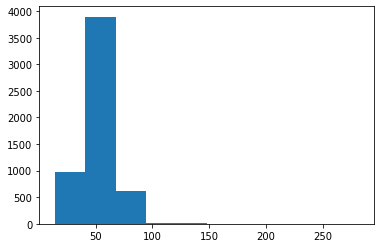

In [9]:
# label 카테고리 체크
print(f'set of label: {set(cmpd_df.activity)}')

# similes 길이 체크
smiles_lens = []
for i in cmpd_df.smiles:
    smiles_lens.append(len(i))
print(f'\nSmiles mean: {np.mean(smiles_lens)}')

# smiles 길이 히스토그램 그리기
plt.hist(smiles_lens)
plt.show()

In [15]:
print(f'data shape: {cmpd_df.shape}')

print('\n### Check train, test size in total ###')
train_size = len(cmpd_df[cmpd_df.group.eq('train')])
test_size = len(cmpd_df[cmpd_df.group.eq('test')])
print(f"size of train: {train_size} \tsize of test: {test_size}")
print(f"ratio of [train: test]: {round(train_size/test_size, 2)}: {1}")

print('\n### Check active, inactive size in total ###')
active_size = len(cmpd_df[cmpd_df['activity'] == 'active'])
inactive_size = len(cmpd_df[cmpd_df['activity'] != 'active'])
print(f"size of active: {active_size} \tsize of active: {inactive_size}")
print(f"ratio of [active: inactive]: {1}: {round(inactive_size/active_size, 2)}")

print("\n### Check active, inactive size in train ###")
active_size_in_train = len(cmpd_df[(cmpd_df['activity'] == 'active') & cmpd_df.group.eq('train')])
inactive_size_in_train = len(cmpd_df[(cmpd_df['activity'] != 'active')  & cmpd_df.group.eq('train')])
print(f"size of active: {active_size_in_train} \tsize of inactive: {inactive_size_in_train}")
print(f"ratio of [active: inactive]: {round(active_size_in_train/inactive_size_in_train, 2)}: {1}")

print("\n### Check active, inactive size in test ###")
active_size_in_test = len(cmpd_df[(cmpd_df['activity'] == 'active') & cmpd_df.group.eq('test')])
inactive_size_in_test = len(cmpd_df[(cmpd_df['activity'] != 'active')  & cmpd_df.group.eq('test')])
print(f"size of active: {active_size_in_test} \tsize of inactive: {inactive_size_in_test}")
print(f"ratio of [active: inactive]: {1}: {round(inactive_size_in_test/active_size_in_test, 2)}")

data shape: (5530, 4)

### Check train, test size in total ###
size of train: 3977 	size of test: 1553
ratio of [train: test]: 2.56: 1

### Check active, inactive size in total ###
size of active: 2704 	size of active: 2826
ratio of [active: inactive]: 1: 1.05

### Check active, inactive size in train ###
size of active: 2146 	size of inactive: 1831
ratio of [active: inactive]: 1.17: 1

### Check active, inactive size in test ###
size of active: 558 	size of inactive: 995
ratio of [active: inactive]: 1: 1.78
